##### Variance Inflation Factor (VIF)

VIF measures how much the variance of an estimated regression coefficient increases if the predictors are correlated. A VIF value greater than 10 is often considered indicative of multicollinearity.

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = joined_dataset.copy()

pce = X['PCE']

# Exclude 'PCE' from VIF calculation but keep it in the dataset
X_without_PCE = X.drop(columns=['PCE']) if 'PCE' in X.columns else X.copy()

# Handle missing (NaN) and infinite (inf) values
X_without_PCE = X_without_PCE.fillna(X_without_PCE.mean())


In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = X_without_PCE.columns
vif_data["VIF"] = [variance_inflation_factor(X_without_PCE.values, i) for i in range(X_without_PCE.shape[1])]
vif_data = vif_data.sort_values(by='VIF', ascending=False)
print(vif_data)


                                               feature         VIF
48                 Personal Cons. Expend.: Chain Index  945.259947
41                                 PPI: Finished Goods  576.456603
42                        PPI: Finished Consumer Goods  512.761422
51                        Personal Cons. Exp: Services  422.030946
16           All Employees: Goods-Producing Industries  248.483816
50                Personal Cons. Exp: Nondurable goods  227.218059
15                        All Employees: Total nonfarm  217.046088
57                              Secondary_Sector_Index  209.832962
52               Avg Hourly Earnings : Goods-Producing  168.465171
28           S&P s Common Stock Price Index: Composite  120.265499
29         S&P s Common Stock Price Index: Industrials  116.082784
5                                             IP Index   83.667152
47                                     CPI : All Items   82.649983
63                                Final_Products_Index   80.97

In [ ]:

ignored_columns =[]
#ignored_columns = ["Civilian Unemployment Rate","Civilian Employment","Housing Starts: Total New Privately Owned","Avg Weekly Hours : Goods-Producing",
#                  "Avg Weekly Hours : Manufacturing","Personal Cons. Expend.: Chain Index","Civilian Labor Force","All Employees: Total nonfarm"]  # Add any other columns you want to ignore in this list

while True:
    # Calculate VIF for features not in the ignored list
    vif_data = pd.DataFrame()
    vif_data["feature"] = [column for column in X_without_PCE.columns if column not in ignored_columns]
    vif_data["VIF"] = [variance_inflation_factor(X_without_PCE[vif_data["feature"]].values, i) for i in range(len(vif_data["feature"]))]

    # Find and drop the variable with the highest VIF if it's not in the ignored list
    max_vif = vif_data["VIF"].max()
    if max_vif > 10:  # Assuming 10 as the threshold
        feature_to_drop = vif_data.sort_values("VIF", ascending=False).iloc[0]["feature"]
        if feature_to_drop not in ignored_columns:
            X_without_PCE.drop(columns=[feature_to_drop], inplace=True)
            print(f"Dropping {feature_to_drop} with VIF: {max_vif}")
        else:
            # If the top VIF feature is in the ignore list, remove it from the VIF dataframe and continue
            vif_data = vif_data[vif_data["feature"] != feature_to_drop]
    else:
        break



Dropping Personal Cons. Expend.: Chain Index with VIF: 945.2599469950171
Dropping PPI: Finished Goods with VIF: 571.6269822542896
Dropping All Employees: Goods-Producing Industries with VIF: 243.69387620699257
Dropping All Employees: Total nonfarm with VIF: 208.15206109763997
Dropping Avg Hourly Earnings : Goods-Producing with VIF: 151.5031443172232
Dropping S&P s Common Stock Price Index: Composite with VIF: 116.19512062415967
Dropping IP Index with VIF: 76.96138342360842
Dropping Moody s Aaa Corporate Bond Minus FEDFUNDS with VIF: 66.26520811106896
Dropping CPI : All Items with VIF: 63.90356767364602
Dropping Final_Products_Index with VIF: 56.67837591607776
Dropping Civilian Employment with VIF: 36.838458475666975
Dropping Monetary_Aggregates_Index with VIF: 24.045518416428898
Dropping Long_Term_Rate_Index with VIF: 19.30531102795037
Dropping PPI: Finished Consumer Goods with VIF: 15.256176381812494
Dropping Retail and Food Services Sales with VIF: 14.430489209931803
Dropping Persona

In [ ]:

# update the refined_dataset
# Add 'PCE' back to the dataset if it was removed initially
# refined_dataset = pd.concat([X_without_PCE, pce], axis=1) 
# refined_dataset.head()

<div style="color:#00BFFF">

---

##### Further Inspecting for multicolinearity and handling with Variance Inflation Factor (VIF)


<div style="color:#FF7F50">

**Addressing Multicollinearity: A Comprehensive Approach**

</div>

In our pursuit of building accurate and robust predictive models, we understand the importance of addressing multicollinearity, a phenomenon where multiple indicators exhibit high correlation with each other. Multicollinearity can introduce ambiguity into the significance of individual variables in a regression model, potentially leading to unreliable results.

To mitigate multicollinearity, we've taken several proactive steps.

- Differencing and Standardization
- Granular Data Pruning
- Dimensionality Reduction through creating composite index

<div style="color:#FF7F50">

**Variance Inflation Factor (VIF) as a Thorough Check**

</div>

To be thorough in our approach, we will utilize the Variance Inflation Factor (VIF). VIF quantifies how much the variance of a regression coefficient is influenced by the correlation among predictors. A VIF value exceeding 10 is commonly regarded as an indicator of multicollinearity. By assessing VIF, we can pinpoint specific instances of high collinearity and take targeted corrective measures.


VIF measures how much the variance of an estimated regression coefficient increases if the predictors are correlated. A VIF value greater than 10 is often considered indicative of multicollinearity.


In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

def calculate_vif(X, thresh=10):
    """
    Calculates VIF for each feature and returns a DataFrame.
    """
    vif_data = pd.DataFrame()
    vif_data["feature"] = X.columns
    vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    return vif_data.sort_values(by="VIF", ascending=False)

def preprocess_dataset(X):
    """
    Preprocesses the dataset by filling NaN values and replacing inf values.
    """
    # Replace infinite values with NaN
    X.replace([np.inf, -np.inf], np.nan, inplace=True)

    # Fill NaN values with the mean of each column
    # Consider using median or mode based on the distribution of your data
    X.fillna(X.mean(), inplace=True)
    return X

def refine_features_based_on_vif_and_correlation(dataset, target, ignored_columns=[], threshold=10):
    X = dataset.copy()
    y = X.pop(target)

    # Preprocess the dataset to handle missing and infinite values
    X = preprocess_dataset(X)

    # Initial VIF calculation
    while True:
        vif_data = calculate_vif(X)
        vif_data = vif_data[~vif_data['feature'].isin(ignored_columns)]
        max_vif = vif_data['VIF'].max()
        
        if max_vif <= threshold:
            break

        # Calculate correlations with target
        abs_correlations = X.join(y).corr()[target].abs().drop(target)
        
        # Merge VIF and correlation data
        combined_data = vif_data.set_index('feature').join(abs_correlations.rename('abs_correlation'))
        
        # Rule for feature removal: High VIF and low correlation with target
        combined_data['removal_score'] = combined_data['VIF'] / combined_data['abs_correlation']
        feature_to_drop = combined_data.sort_values('removal_score', ascending=False).index[0]

        # Drop the selected feature
        print(f"Dropping {feature_to_drop} with VIF: {vif_data.loc[vif_data['feature'] == feature_to_drop, 'VIF'].iloc[0]} and correlation: {combined_data.loc[feature_to_drop, 'abs_correlation']}")
        X.drop(columns=[feature_to_drop], inplace=True)

    print("Final set of features:", X.columns.tolist())
    return X,vif_data


ignored_columns = [
    "Civilian Unemployment Rate",
    "Civilian Employment",
    "Civilian Labor Force",
    "CPI_Index",
    "IP Index",
    "Personal Cons. Expend.: Chain Index",
    "Civilians Unemployed",
    "All Employees: Total nonfarm",
    "Tertiary_Sector_Employment",
    "Retail and Food Services Sales",
    "CPI : All Items",
    "New Private Housing Permits (SAAR)"
]

# Example usage
refined_dataset,vif_data = refine_features_based_on_vif_and_correlation(joined_dataset, 'PCE', ignored_columns=ignored_columns)


Dropping Avg Weekly Hours : Goods-Producing with VIF: 744539.0159879505 and correlation: 0.17890445918950593
Dropping All Employees: Manufacturing with VIF: 577647.1181875282 and correlation: 0.5929949925241669
Dropping Housing Starts: Total New Privately Owned with VIF: 68903.54021725751 and correlation: 0.28113929602857984
Dropping Personal Cons. Exp: Nondurable goods with VIF: 11859.690632881007 and correlation: 0.08170138004842696
Dropping S&P s Composite Common Stock: Dividend Yield with VIF: 55.11099643841789 and correlation: 0.0005534141287516313
Dropping All Employees: Service-Providing Industries with VIF: 57598.87292854174 and correlation: 0.8767028457788396
Dropping IP: Materials with VIF: 25001.657231208883 and correlation: 0.6158440201005
Dropping PPI: Finished Consumer Goods with VIF: 1281.1673849690037 and correlation: 0.03687885011611912
Dropping Switzerland / U.S. Foreign Exchange Rate with VIF: 9.36288453350842 and correlation: 0.000310582907347434
Dropping Moody s Aa

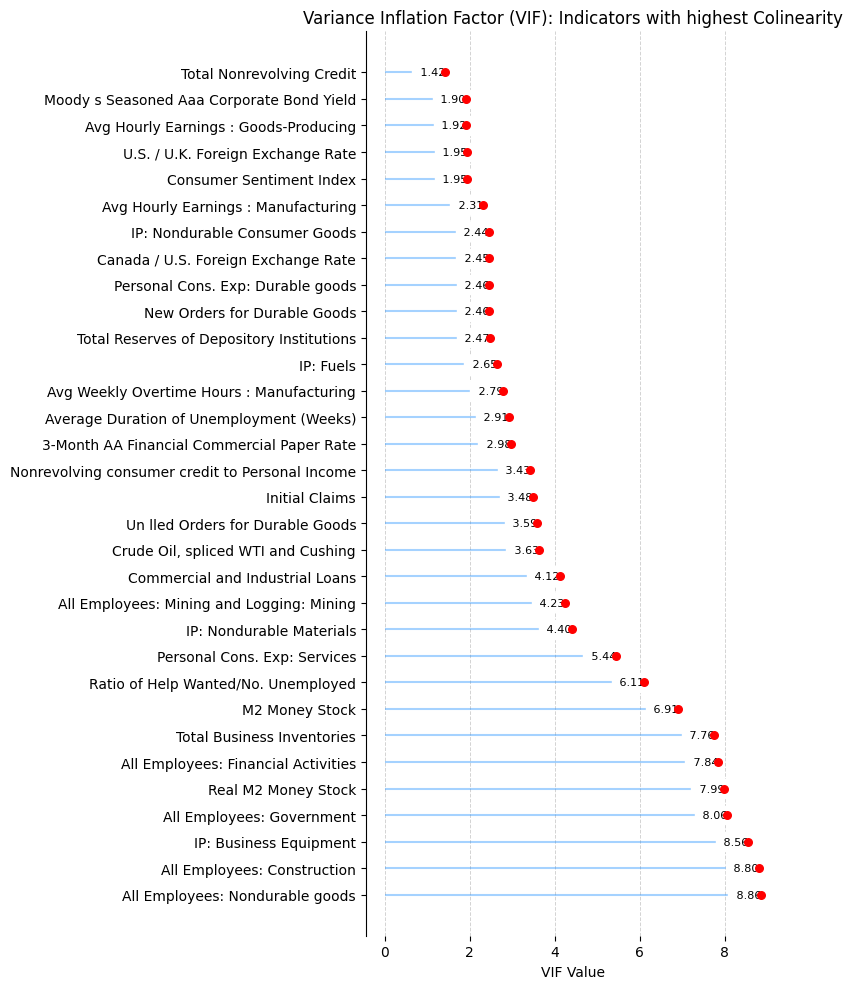

In [ ]:
from utils.visualisation import lollipop

lollipop(vif_data, 0)

<div style="color:#FF7F50">

**Handling highest VIF indciators**

</div>

- This code snippet performs a Variance Inflation Factor (VIF) analysis to identify and remove multicollinear features from a dataset, except for those specifically ignored.

- It iterates through the dataset, calculating VIFs for all features not in the `ignored_columns` list.
- If a feature's VIF exceeds 10, indicating high multicollinearity, and it's not on the ignored list, that feature is dropped from the dataset.
- The process repeats until no feature's VIF exceeds 10, ensuring the remaining dataset has reduced multicollinearity, enhancing model reliability.


In [ ]:
# # Sort VIF data by the VIF value
# vif_data = vif_data.sort_values(by="VIF", ascending=True)

# lollipop(vif_data, 0)